# Closed Form Solution - Code Tutorial


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [4]:
# Generate Dataset
X,Y=make_regression(n_samples=400,n_features=1,n_informative=1,noise=1.8,random_state=11)
print(X.shape,Y.shape)
Y=Y.reshape((-1,1))
print(X.shape,Y.shape)

(400, 1) (400,)
(400, 1) (400, 1)


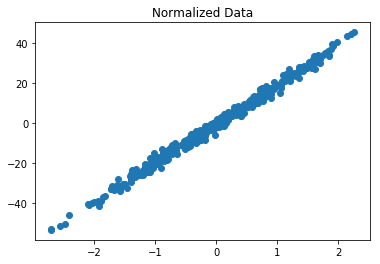

In [5]:
# Normalize
X=(X-X.mean())/X.std()

# Visualize
plt.figure()
plt.scatter(X,Y)
plt.title('Normalized Data')
plt.show()

In [9]:
ones=np.ones((X.shape[0],1))
X_=np.hstack((X,ones))
print(X_.shape)
print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [16]:
def predict(X,theta):
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    print(type(X),type(Y))
    Y=np.mat(Y) # mat means matrix conversion earlier it was a vector
    print(type(X),type(Y))
    firstPart=np.dot(X.T,X) # T means transpose
    secondPart=np.dot(X.T,Y)
    theta=np.linalg.pinv(firstPart)*secondPart # Linear Algebra Pseudo Inverse
    return theta

In [17]:
theta=getThetaClosedForm(X_,Y)
print(theta)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.matrixlib.defmatrix.matrix'>
[[19.45877082]
 [-0.29187892]]


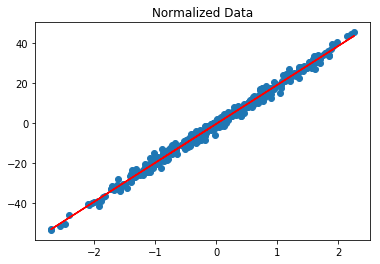

In [21]:
# Visualize
plt.figure()
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='red',label='Prediction')
plt.title('Normalized Data')
plt.show()

# LOWESS Implementation 1 - Data Preparation

## Locally Weighted Regression
1 ) Read and Normalise the Dataset

2 ) Generate W for every query point!

3 ) No training is involved, directly make prediction using closed form solution we derived !

 (X'WX)inv* X'WY where X' is X Transpose
 
4 ) Find the best value of Tau(Bandwidth Parameter)[Cross Validation]

## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
dfx=pd.read_csv('../Csv Files/weightedX.csv')
dfy=pd.read_csv('../Csv Files/weightedY.csv')
x=dfx.values
y=dfy.values
print(x.shape,y.shape)

(99, 1) (99, 1)


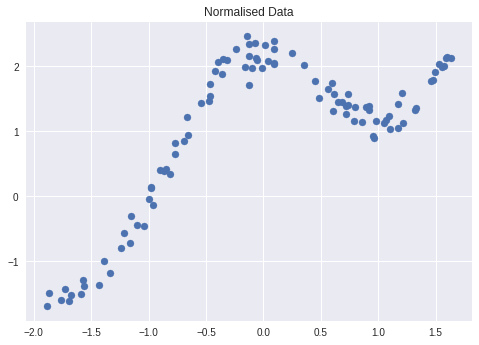

In [3]:
# Normalise
x=(x-x.mean())/x.std()

plt.style.use('seaborn')
plt.title('Normalised Data')
plt.scatter(x,y)
plt.show()

# LOWESS Implementation 2 - Computing W

## 2. Find out W(mxm) diagonal matrix

In [31]:
print(type(np.mat(np.eye(5))))

# a*b --> a,b --> matrices --> Matrix Multiplication we can use np.dot also
# a*b --> a,b --> ndarray --> Element-Wise Multiplication

<class 'numpy.matrixlib.defmatrix.matrix'>


In [36]:
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        W[i,i]=np.exp(np.dot(X[i]-query_point,(X[i]-query_point).T)/(-2*tau*tau))
    return W

In [37]:
X=np.mat(x)
Y=np.mat(y)
M=X.shape[0]

W=getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [40]:
W=getW(-1,X,100) # Larger tau is closer to identity matrix (more like a linear regression)
print(W.shape)
print(W)

(99, 99)
[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [41]:
W=getW(-1,X,.5) # Larger tau is closer to identity matrix (more like a linear regression)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


# LOWESS Implementation 3 - Making Predictions

In [42]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((X,ones))
    print(X_.shape)
    print(X_[:5,])

In [43]:
predict(X,Y,1.0,1.0)

(99, 2)
[[-0.35705077  1.        ]
 [-0.8177695   1.        ]
 [-0.35449839  1.        ]
 [ 0.56434066  1.        ]
 [-0.0695723   1.        ]]


In [44]:
np.mat?

In [47]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    print(W.shape)
    
predict(X,Y,1.0,1.0)

(99, 99)


In [51]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    # theta = (X'WX)inv* X'WY
    theta=np.linalg.pinv(X.T*(W*X))*(X.T*(W*Y))
    return theta
    
predict(X,Y,1.0,1.0)

matrix([[1.16737591]])

In [54]:
def predict(X,Y,query_x,tau):
    m=X.shape[0]
    ones=np.ones((m,1))
    X_=np.hstack((X,ones))
    qx=np.mat([query_x,1])
    W=getW(qx,X_,tau)
    # theta = (X'WX)inv* X'WY
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    prediction=np.dot(qx,theta)
    return theta,prediction
    
theta,prediction=predict(X,Y,1.0,1.0)

In [55]:
print(theta)
print(prediction)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


# LOWESS Implementation 4 - Effect of Bandwidth Parameter

## 4. Visualize predictions and analyse the effect of tau

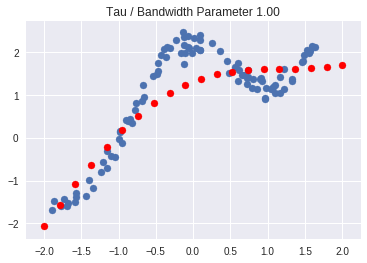

In [67]:
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])# pred or pred[0] or pred[0][0]
    Y_test=np.array(Y_test)
    XO=np.array(X)
    YO=np.array(Y)
    plt.title('Tau / Bandwidth Parameter %0.2f'%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()
    
plotPrediction(1)

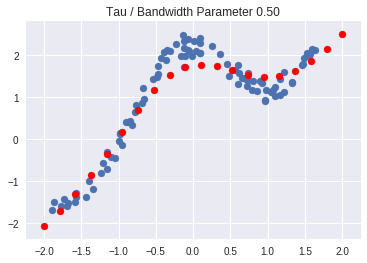

In [68]:
plotPrediction(0.5)

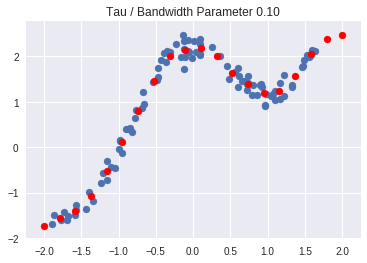

In [69]:
plotPrediction(.1)

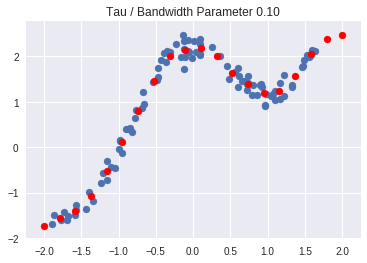

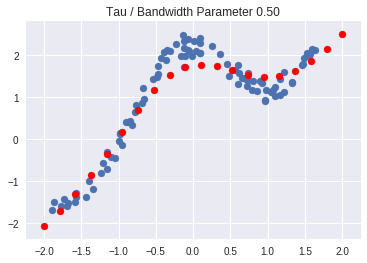

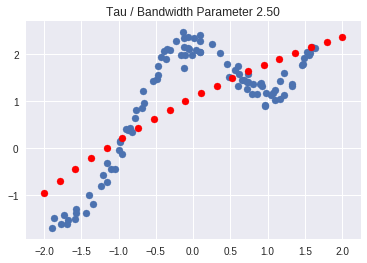

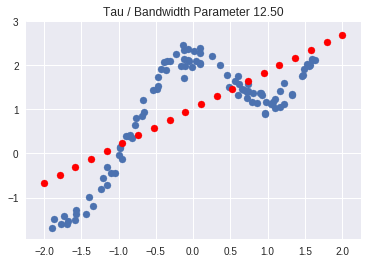

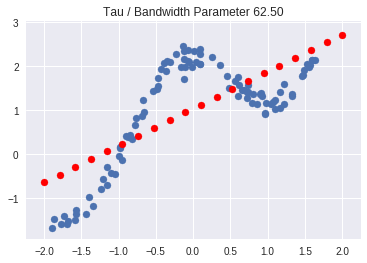

In [70]:
tau=[0.1,0.5,2.5,12.5,62.5]
for t in tau:
    plotPrediction(t)